In [1]:
import keras

from keras import models
from keras import layers

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

import matplotlib.pyplot as plt

import numpy as np


def smooth_curve(points, factor=0.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points


def show_history(history):
    acc = smooth_curve(history.history['acc'])
    val_acc = smooth_curve(history.history['val_acc'])
    loss = smooth_curve(history.history['loss'])
    val_loss = smooth_curve(history.history['val_loss'])

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title("Training and Validation accuracy")
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title("Training and Validation loss")
    plt.legend()

    plt.show()

def set_trainable(conv_base, flag):
    if flag == '0':
        conv_base.trainable = False
    else:
        conv_base.trainable = True
        set_trainable = False
        for layer in conv_base.layers:
            if layer.name == flag:
                set_trainable = True
            if set_trainable:
                layer.trainable = True
            else:
                layer.trainable = False
            print(layer.trainable)    
    
base_dir = 'C:/Taeuk/SafeBarDetectDatasets/'
train_dir = base_dir+'train'
test_dir = base_dir+'test'
validation_dir = base_dir+'validation'

save_path = "C:/jupyter/checkpoints/{epoch:02d}-{val_loss:.4f}.hdf5"
cb_checkpoint = keras.callbacks.ModelCheckpoint(
    filepath=save_path, 
    monitor='val_loss',
    verbose=1, 
    save_best_only=True)

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    fill_mode='nearest'
)
test_datagen = ImageDataGenerator(rescale=1. / 255)

json_path = './Xception.json'

Using TensorFlow backend.


In [2]:
conv_base = keras.applications.xception.Xception(
    weights='imagenet', 
    input_shape=(299, 299, 3),
    include_top=False,
    classes=1,
)

ref = keras.applications.mobilenet_v2.MobileNetV2()

conv_base.summary()
ref.summary()

for layer in ref.layers:
    print(layer.name)

W1110 21:41:03.223386 20008 deprecation_wrapper.py:119] From C:\Users\User24\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1110 21:41:03.239388 20008 deprecation_wrapper.py:119] From C:\Users\User24\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1110 21:41:03.241383 20008 deprecation_wrapper.py:119] From C:\Users\User24\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1110 21:41:03.259376 20008 deprecation_wrapper.py:119] From C:\Users\User24\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W1110 21:41:03.260367 20008 deprecation_wrapper.py:1

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
__________________________________________________________________________________________________
block1_con

In [3]:
set_trainable(conv_base, 'block14_sepconv2')

model = models.Sequential()
model.add(conv_base)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(1, activation='sigmoid'))

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(299, 299), # (224, 224)
    batch_size=20,
    class_mode='binary' # 'categorical'
    
)
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(299, 299), # (224, 224)
    batch_size=20,
    class_mode='binary' # 'categorical'
)

XCEPTION_json = XCEPTION.to_json()
with open(json_path, 'w') as json_file:
    json_file.write(XCEPTION_json)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
True
True
Found 1203 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


W1110 21:41:16.333851 20008 deprecation_wrapper.py:119] From C:\Users\User24\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1110 21:41:16.340846 20008 deprecation.py:323] From C:\Users\User24\Anaconda3\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/50
 - 1196s - loss: 0.3268 - acc: 0.9162 - val_loss: 0.1762 - val_acc: 0.9200

Epoch 00001: val_loss improved from inf to 0.17617, saving model to C:/jupyter/checkpoints/01-0.1762.hdf5
Epoch 2/50
 - 1133s - loss: 0.1254 - acc: 0.9785 - val_loss: 0.1378 - val_acc: 0.9200

Epoch 00002: val_loss improved from 0.17617 to 0.13785, saving model to C:/jupyter/checkpoints/02-0.1378.hdf5
Epoch 3/50
 - 1192s - loss: 0.0831 - acc: 0.9779 - val_loss: 0.1362 - val_acc: 0.9200

Epoch 00003: val_loss improved from 0.13785 to 0.13620, saving model to C:/jupyter/checkpoints/03-0.1362.hdf5
Epoch 4/50
 - 1172s - loss: 0.0616 - acc: 0.9857 - val_loss: 0.1179 - val_acc: 0.9200

Epoch 00004: val_loss improved from 0.13620 to 0.11790, saving model to C:/jupyter/checkpoints/04-0.1179.hdf5
Epoch 5/50
 - 1369s - loss: 0.0348 - acc: 0.9930 - val_loss: 0.1146 - val_acc: 0.9300

Epoch 00005: val_loss improved from 0.11790 to 0.11456, saving model to C:/jupyter/checkpoints/05-0.1146.hdf5
Epoch 6/50
 - 1174s

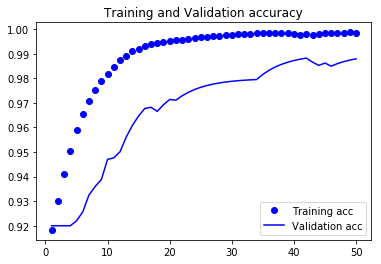

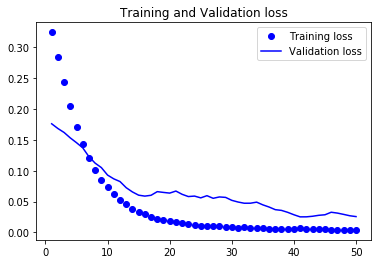

In [4]:
model.compile(
    loss='binary_crossentropy', # 'categorical_crossentropy'
    optimizer=optimizers.RMSprop(lr=1e-4),
    metrics=['acc']
)

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=50,
    verbose=2,
    callbacks=[cb_checkpoint]
)

show_history(history)

In [6]:
model_json = model.to_json()
with open("Xception.json", 'w') as json_file:
    json_file.write(model_json)